In [186]:
import pandas as pd
import numpy as np

df = pd.read_csv("final_data.csv")
df

,Age,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Residence_Type_With Family,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Course_Business,Course_Computer Science,Course_Engineering,Course_Law,Course_Medical,Course_Others
0,25,0,3.56,3,3,2,3,2,3,2,...,0,0,1,0,0,0,0,0,0,1
1,24,1,2.44,0,3,0,2,1,2,1,...,0,0,0,1,0,0,1,0,0,0
2,19,1,3.74,4,0,3,3,1,2,2,...,0,1,0,0,1,0,0,0,0,0
3,18,0,3.40,3,3,4,3,1,2,3,...,0,0,1,0,1,0,0,0,0,0
4,21,1,3.35,2,4,3,3,2,3,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,20,1,3.69,3,1,5,3,1,1,3,...,0,0,0,1,0,0,0,1,0,0
7003,24,1,3.73,3,4,1,3,2,2,3,...,0,0,0,1,0,0,0,0,1,0
7004,26,0,3.65,4,5,1,3,3,1,2,...,0,0,1,0,0,0,0,0,0,1
7005,24,0,3.65,4,3,4,2,3,1,2,...,0,0,0,1,0,0,0,0,1,0


In [187]:
df.drop(columns=['Risk'])
df['Risk'] = ((df['Stress_Level'] > 3) | (df['Depression_Score'] > 3 )| (df['Anxiety_Score'] > 3)).astype(int)

In [188]:
df.Risk.value_counts()

Risk
1    4265
0    2742
Name: count, dtype: int64

In [189]:
df = df.drop(['Stress_Level', 'Depression_Score', 'Anxiety_Score'], axis=1)

df


,Age,Gender,CGPA,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Substance_Use,Counseling_Service_Use,Family_History,...,Residence_Type_With Family,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Course_Business,Course_Computer Science,Course_Engineering,Course_Law,Course_Medical,Course_Others
0,25,0,3.56,3,2,3,2,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,24,1,2.44,2,1,2,1,2,2,0,...,0,0,0,1,0,0,1,0,0,0
2,19,1,3.74,3,1,2,2,1,2,0,...,0,1,0,0,1,0,0,0,0,0
3,18,0,3.40,3,1,2,3,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,21,1,3.35,3,2,3,3,1,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,20,1,3.69,3,1,1,3,1,3,1,...,0,0,0,1,0,0,0,1,0,0
7003,24,1,3.73,3,2,2,3,1,2,0,...,0,0,0,1,0,0,0,0,1,0
7004,26,0,3.65,3,3,1,2,1,2,0,...,0,0,1,0,0,0,0,0,0,1
7005,24,0,3.65,2,3,1,2,1,1,0,...,0,0,0,1,0,0,0,0,1,0


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , recall_score

In [191]:
X = df.drop('Risk', axis=1)
y = df['Risk']             

X_train , X_test , y_train , y_test =  train_test_split(X, y, test_size=0.2, random_state=42)  

In [179]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split data if not already split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with tuned hyperparameters
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_leaf=3,
    max_features='log2',
    random_state=42
)
rf.fit(X_train, y_train)

# Predict probabilities for class 1
y_probs = rf.predict_proba(X_test)[:, 1]

# Function to find best threshold for class 1
best_threshold = 0.5
best_f1 = 0

thresholds = np.arange(0.1, 0.9, 0.01)
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Predict using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluate
print(f"Best threshold for class 1: {best_threshold}")
print(f"F1-score (class 1): {f1_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Recall (class 1): {recall_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Precision (class 1): {precision_score(y_test, y_pred_best, pos_label=1):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Best threshold for class 1: 0.1
F1-score (class 1): 0.7593
Recall (class 1): 1.0000
Precision (class 1): 0.6120

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       544
           1       0.61      1.00      0.76       858

    accuracy                           0.61      1402
   macro avg       0.31      0.50      0.38      1402
weighted avg       0.37      0.61      0.46      1402

Confusion Matrix:
[[  0 544]
 [  0 858]]


c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [183]:
import numpy as np

thresholds = [0.1, 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9]
f1_scores, recalls, precisions = [], [], []

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred, pos_label=1))
    recalls.append(recall_score(y_test, y_pred, pos_label=1))
    precisions.append(precision_score(y_test, y_pred, pos_label=1))

# Convert to numpy arrays
f1_scores = np.array(f1_scores)
recalls = np.array(recalls)
precisions = np.array(precisions)

# Find threshold where the difference between metrics is minimal
diff = np.abs(f1_scores - recalls) + np.abs(f1_scores - precisions) + np.abs(recalls - precisions)
best_index = np.argmin(diff)

best_threshold = thresholds[best_index]
print(f"Best intersection threshold: {best_threshold}")
print(f"F1-score: {f1_scores[best_index]:.4f}, Recall: {recalls[best_index]:.4f}, Precision: {precisions[best_index]:.4f}")


Best intersection threshold: 0.7
F1-score: 0.0000, Recall: 0.0000, Precision: 0.0000


c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

For Random Forest, no scaling is actually required.

Reasons:
Random Forest is tree-based, which splits data based on thresholds, not distances.
Feature ranges do not affect the splitting criteria.
Standardization or normalization does not improve model performance.

Summary:
You can keep numeric features as-is, or optionally scale for consistency.
Using StandardScaler or MinMaxScaler has no real impact on Random Forest.

In [173]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [174]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 'log2', None]
# }

# rf_rand = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=50, 
#     cv=5,
#     scoring='recall',
#     n_jobs=-1,
#     random_state=42
# )
# rf_rand.fit(X_train, y_train)

# print("Best params:", rf_rand.best_params_)
# print("Best CV accuracy:", rf_rand.best_score_)

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = []
recall_list = []
precision_list = []
f_score = []

for depth in range(10, 20):
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=depth,
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    acc.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred, average='macro'))
    precision_list.append(precision_score(y_test, y_pred, average='macro'))
    f_score.append(f1_score(y_test, y_pred, average='macro'))

# Print results
for i, depth in enumerate(range(10, 20)):
    print(f"max_depth: {depth}")
    print(f"Accuracy: {acc[i]:.4f}, Recall: {recall_list[i]:.4f}, Precision: {precision_list[i]:.4f}, F1-score: {f_score[i]:.4f}")
    print("-"*40)


max_depth: 10
Accuracy: 0.6177, Recall: 0.5430, Precision: 0.5772, F1-score: 0.5178
----------------------------------------
max_depth: 11
Accuracy: 0.6255, Recall: 0.5551, Precision: 0.5914, F1-score: 0.5363
----------------------------------------
max_depth: 12
Accuracy: 0.6113, Recall: 0.5381, Precision: 0.5657, F1-score: 0.5141
----------------------------------------
max_depth: 13
Accuracy: 0.6184, Recall: 0.5473, Precision: 0.5789, F1-score: 0.5267
----------------------------------------
max_depth: 14
Accuracy: 0.6220, Recall: 0.5529, Precision: 0.5852, F1-score: 0.5351
----------------------------------------
max_depth: 15
Accuracy: 0.6163, Recall: 0.5476, Precision: 0.5757, F1-score: 0.5295
----------------------------------------
max_depth: 16
Accuracy: 0.6170, Recall: 0.5522, Precision: 0.5777, F1-score: 0.5382
----------------------------------------
max_depth: 17
Accuracy: 0.6134, Recall: 0.5479, Precision: 0.5720, F1-score: 0.5329
----------------------------------------


In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = []
recall_list = []
precision_list = []
f_score = []

for depth in range(10, 20):
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=depth,
        class_weight='balanced',
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    acc.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred, average='macro'))
    precision_list.append(precision_score(y_test, y_pred, average='macro'))
    f_score.append(f1_score(y_test, y_pred, average='macro'))

# Print results
for i, depth in enumerate(range(10, 20)):
    print(f"max_depth: {depth}")
    print(f"Accuracy: {acc[i]:.4f}, Recall: {recall_list[i]:.4f}, Precision: {precision_list[i]:.4f}, F1-score: {f_score[i]:.4f}")
    print("-"*40)


max_depth: 10
Accuracy: 0.6191, Recall: 0.5818, Precision: 0.5900, F1-score: 0.5823
----------------------------------------
max_depth: 11
Accuracy: 0.6184, Recall: 0.5752, Precision: 0.5867, F1-score: 0.5744
----------------------------------------
max_depth: 12
Accuracy: 0.6141, Recall: 0.5663, Precision: 0.5796, F1-score: 0.5636
----------------------------------------
max_depth: 13
Accuracy: 0.6070, Recall: 0.5538, Precision: 0.5680, F1-score: 0.5479
----------------------------------------
max_depth: 14
Accuracy: 0.6034, Recall: 0.5451, Precision: 0.5606, F1-score: 0.5355
----------------------------------------
max_depth: 15
Accuracy: 0.6155, Recall: 0.5530, Precision: 0.5762, F1-score: 0.5410
----------------------------------------
max_depth: 16
Accuracy: 0.6177, Recall: 0.5534, Precision: 0.5790, F1-score: 0.5401
----------------------------------------
max_depth: 17
Accuracy: 0.6155, Recall: 0.5490, Precision: 0.5750, F1-score: 0.5332
----------------------------------------


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = []
recall_list = []
precision_list = []
f_score = []

for depth in range(20, 30):
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=depth,
        class_weight='balanced',
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    acc.append(accuracy_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred, average='macro'))
    precision_list.append(precision_score(y_test, y_pred, average='macro'))
    f_score.append(f1_score(y_test, y_pred, average='macro'))

# Print results
for i, depth in enumerate(range(20, 30)):
    print(f"max_depth: {depth}")
    print(f"Accuracy: {acc[i]:.4f}, Recall: {recall_list[i]:.4f}, Precision: {precision_list[i]:.4f}, F1-score: {f_score[i]:.4f}")
    print("-"*40)


max_depth: 20
Accuracy: 0.6041, Recall: 0.5323, Precision: 0.5538, F1-score: 0.5091
----------------------------------------
max_depth: 21
Accuracy: 0.6205, Recall: 0.5507, Precision: 0.5827, F1-score: 0.5319
----------------------------------------
max_depth: 22
Accuracy: 0.6177, Recall: 0.5484, Precision: 0.5779, F1-score: 0.5299
----------------------------------------
max_depth: 23
Accuracy: 0.6298, Recall: 0.5596, Precision: 0.5988, F1-score: 0.5416
----------------------------------------
max_depth: 24
Accuracy: 0.6205, Recall: 0.5517, Precision: 0.5828, F1-score: 0.5341
----------------------------------------
max_depth: 25
Accuracy: 0.6205, Recall: 0.5524, Precision: 0.5829, F1-score: 0.5355
----------------------------------------
max_depth: 26
Accuracy: 0.6270, Recall: 0.5576, Precision: 0.5937, F1-score: 0.5402
----------------------------------------
max_depth: 27
Accuracy: 0.6255, Recall: 0.5558, Precision: 0.5913, F1-score: 0.5377
----------------------------------------


In [197]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split dataset (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

# Hyperparameter grid
param_grid = {
    'max_depth': [12],
    'min_samples_leaf': [3],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV using F1-score (macro) for evaluation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  # F1-score accounts for all classes
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1-score (CV):", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 3}
Best F1-score (CV): 0.5338695872539612
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.53      0.26      0.35       544
           1       0.65      0.85      0.73       858

    accuracy                           0.62      1402
   macro avg       0.59      0.56      0.54      1402
weighted avg       0.60      0.62      0.59      1402

Confusion Matrix:
[[143 401]
 [127 731]]


In [198]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with tuned hyperparameters
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=3,
    max_features=None,
    random_state=42
)
rf.fit(X_train, y_train)

# Predict probabilities for class 1
y_probs = rf.predict_proba(X_test)[:, 1]

# Function to find best threshold
best_threshold = 0.5
best_f1_class1 = 0

thresholds = np.arange(0.1, 0.9, 0.01)
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    
    # We focus on F1-score for class 1, but can add constraints for class 0 precision
    precision_class0 = precision_score(y_test, y_pred, pos_label=0)
    recall_class1 = recall_score(y_test, y_pred, pos_label=1)
    f1_class1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Constraint: class 0 precision ≥ 0.2 (adjustable)
    if precision_class0 >= 0.2 and f1_class1 > best_f1_class1:
        best_f1_class1 = f1_class1
        best_threshold = t

# Predict using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluate
print(f"Best threshold: {best_threshold:.2f}")
print(f"Class 1 Recall: {recall_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Class 1 Precision: {precision_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Class 1 F1-score: {f1_score(y_test, y_pred_best, pos_label=1):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Best threshold: 0.21
Class 1 Recall: 1.0000
Class 1 Precision: 0.6129
Class 1 F1-score: 0.7600

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       544
           1       0.61      1.00      0.76       858

    accuracy                           0.61      1402
   macro avg       0.81      0.50      0.38      1402
weighted avg       0.76      0.61      0.47      1402

Confusion Matrix:
[[  2 542]
 [  0 858]]


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split data if not already split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with tuned hyperparameters
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_leaf=3,
    max_features='log2',
    random_state=42
)
rf.fit(X_train, y_train)

# Predict probabilities for class 1
y_probs = rf.predict_proba(X_test)[:, 1]

# Function to find best threshold for class 1
best_threshold = 0.5
best_f1 = 0

thresholds = np.arange(0.1, 0.9, 0.01)
for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Predict using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluate
print(f"Best threshold for class 1: {best_threshold}")
print(f"F1-score (class 1): {f1_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Recall (class 1): {recall_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Precision (class 1): {precision_score(y_test, y_pred_best, pos_label=1):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


In [201]:
import numpy as np
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Predict probabilities for class 1
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.6, 0.01)

# Variables to store best results
best_threshold = 0.5
best_f1_class1 = 0

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    
    recall_class1 = recall_score(y_test, y_pred, pos_label=1)
    precision_class0 = precision_score(y_test, y_pred, pos_label=0)
    f1_class1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Constraint: class 1 recall >= 0.95, class 0 precision >= 0.4
    if recall_class1 >= 0.95 and precision_class0 >= 0.4 and f1_class1 > best_f1_class1:
        best_threshold = t
        best_f1_class1 = f1_class1

# Predict using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluation
print(f"Optimal threshold: {best_threshold:.2f}")
print(f"Class 1 Recall: {recall_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Class 1 Precision: {precision_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Class 1 F1-score: {f1_score(y_test, y_pred_best, pos_label=1):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Optimal threshold: 0.21
Class 1 Recall: 1.0000
Class 1 Precision: 0.6129
Class 1 F1-score: 0.7600

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       544
           1       0.61      1.00      0.76       858

    accuracy                           0.61      1402
   macro avg       0.81      0.50      0.38      1402
weighted avg       0.76      0.61      0.47      1402

Confusion Matrix:
[[  2 542]
 [  0 858]]


c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

In [209]:
# Focus on lower thresholds to increase class 1 recall
thresholds = np.arange(0.2, 0.51, 0.01)  # 0.2 to 0.5

best_threshold = 0.5
best_f1_class1 = 0

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    
    recall_class1 = recall_score(y_test, y_pred, pos_label=1)
    precision_class0 = precision_score(y_test, y_pred, pos_label=0)
    f1_class1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Constraint: class 1 recall ≥ 0.95, class 0 precision ≥ 0.4
    if recall_class1 >= 0.95 and precision_class0 >= 0.4 and f1_class1 > best_f1_class1:
        best_threshold = t
        best_f1_class1 = f1_class1

# Predict using the best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluation
print(f"Optimal threshold for high class 1 recall: {best_threshold:.2f}")
print(f"Class 1 Recall: {recall_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Class 1 Precision: {precision_score(y_test, y_pred_best, pos_label=1):.4f}")
print(f"Class 1 F1-score: {f1_score(y_test, y_pred_best, pos_label=1):.4f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Optimal threshold for high class 1 recall: 0.50
Class 1 Recall: 0.6573
Class 1 Precision: 0.6861
Class 1 F1-score: 0.6714

Confusion Matrix:
[[286 258]
 [294 564]]


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X_train, y_train)
# rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# # y_pred = rf.predict(X_test)
# y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score , precision_score , f1_score
print("Accuracy_score: " , accuracy_score(y_test , y_pred))
print("recall_score" , recall_score(y_test , y_pred))
print("Precision_score" , precision_score(y_test , y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy_score:  0.8152639087018545
recall_score 0.9617996604414262
Precision_score 0.8411284335560505
Confusion Matrix:
 [[  10  214]
 [  45 1133]]


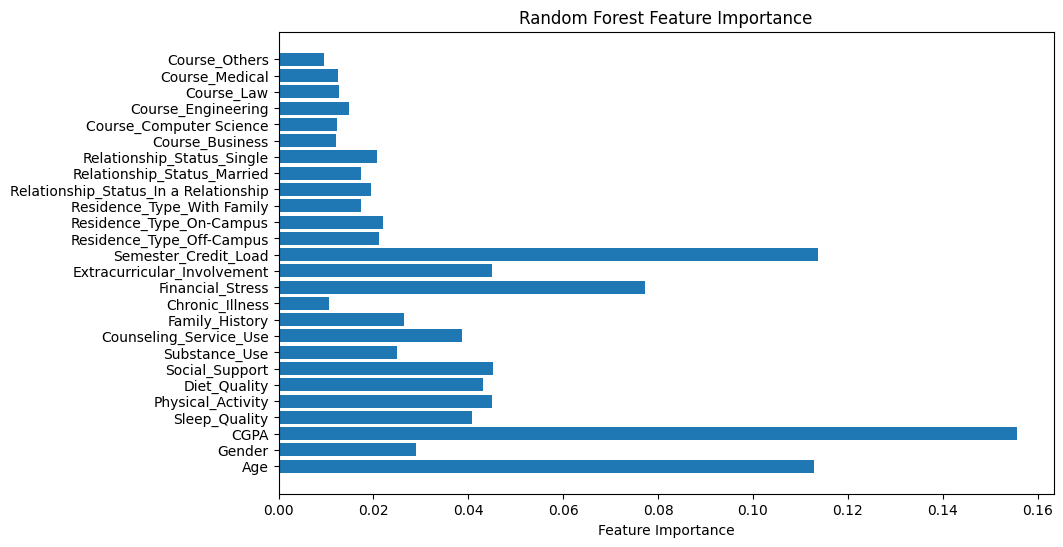

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
low_importance_features = [
    'Course_Others', 'Course_Medical', 'Course_Law', 
    'Course_Engineering', 'Course_Computer_Science', 
    'Course_Business', 'Chronic_Illness'
]

available_features = [col for col in low_importance_features if col in X.columns]
X_reduced = X.drop(columns=available_features , errors='ignore')




X_train_red, X_test_red, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_red, y_train)


y_pred_red = rf_reduced.predict(X_test_red)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_red))
print("Classification Report:\n", classification_report(y_test, y_pred_red))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_red))


Accuracy: 0.8402282453637661
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       224
           1       0.84      1.00      0.91      1178

    accuracy                           0.84      1402
   macro avg       0.42      0.50      0.46      1402
weighted avg       0.71      0.84      0.77      1402

Confusion Matrix:
 [[   0  224]
 [   0 1178]]


c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mohit-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war